<a href="https://colab.research.google.com/github/smanthrala/quote-example/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Churn Prediction**

**Background and Context**

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Dictionary**

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. 
It can take two values 
> * 0=No ( Customer did not leave the bank )
> * 1=Yes ( Customer left the bank )







In [40]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [42]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)


2.8.0


In [43]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Churn.csv")

**Data Overview**

In [44]:
print("There are {} rows and {} columns".format(data.shape[0],data.shape[1]))

There are 10000 rows and 14 columns


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no null values in the data

In [47]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64



*   RowNumber, CustomerId are unique for each row
*   Though Surname has many repeat values, it doesn't contribute to model
*   Geography and Gender are categorical values



In [49]:
df = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [50]:
df.duplicated().sum()

0

* There are no duplicates in the data

In [53]:
#checking the percentage of each class in the dataset
(df.Exited.value_counts())/(df.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

* This show about 20% of the customers are leaving the bank. 

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [52]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


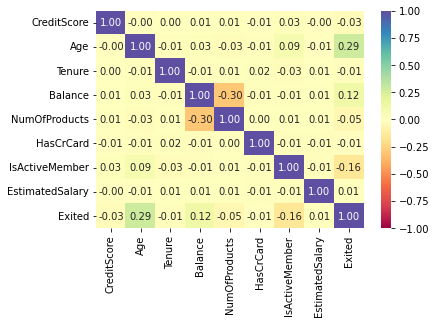

In [14]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral");

* There doesn't seem to much strong co-relation between features
* NumOfProducts and Balance are nagatively co-related
* Exited is negatively corelated with Age and IsActiveMember

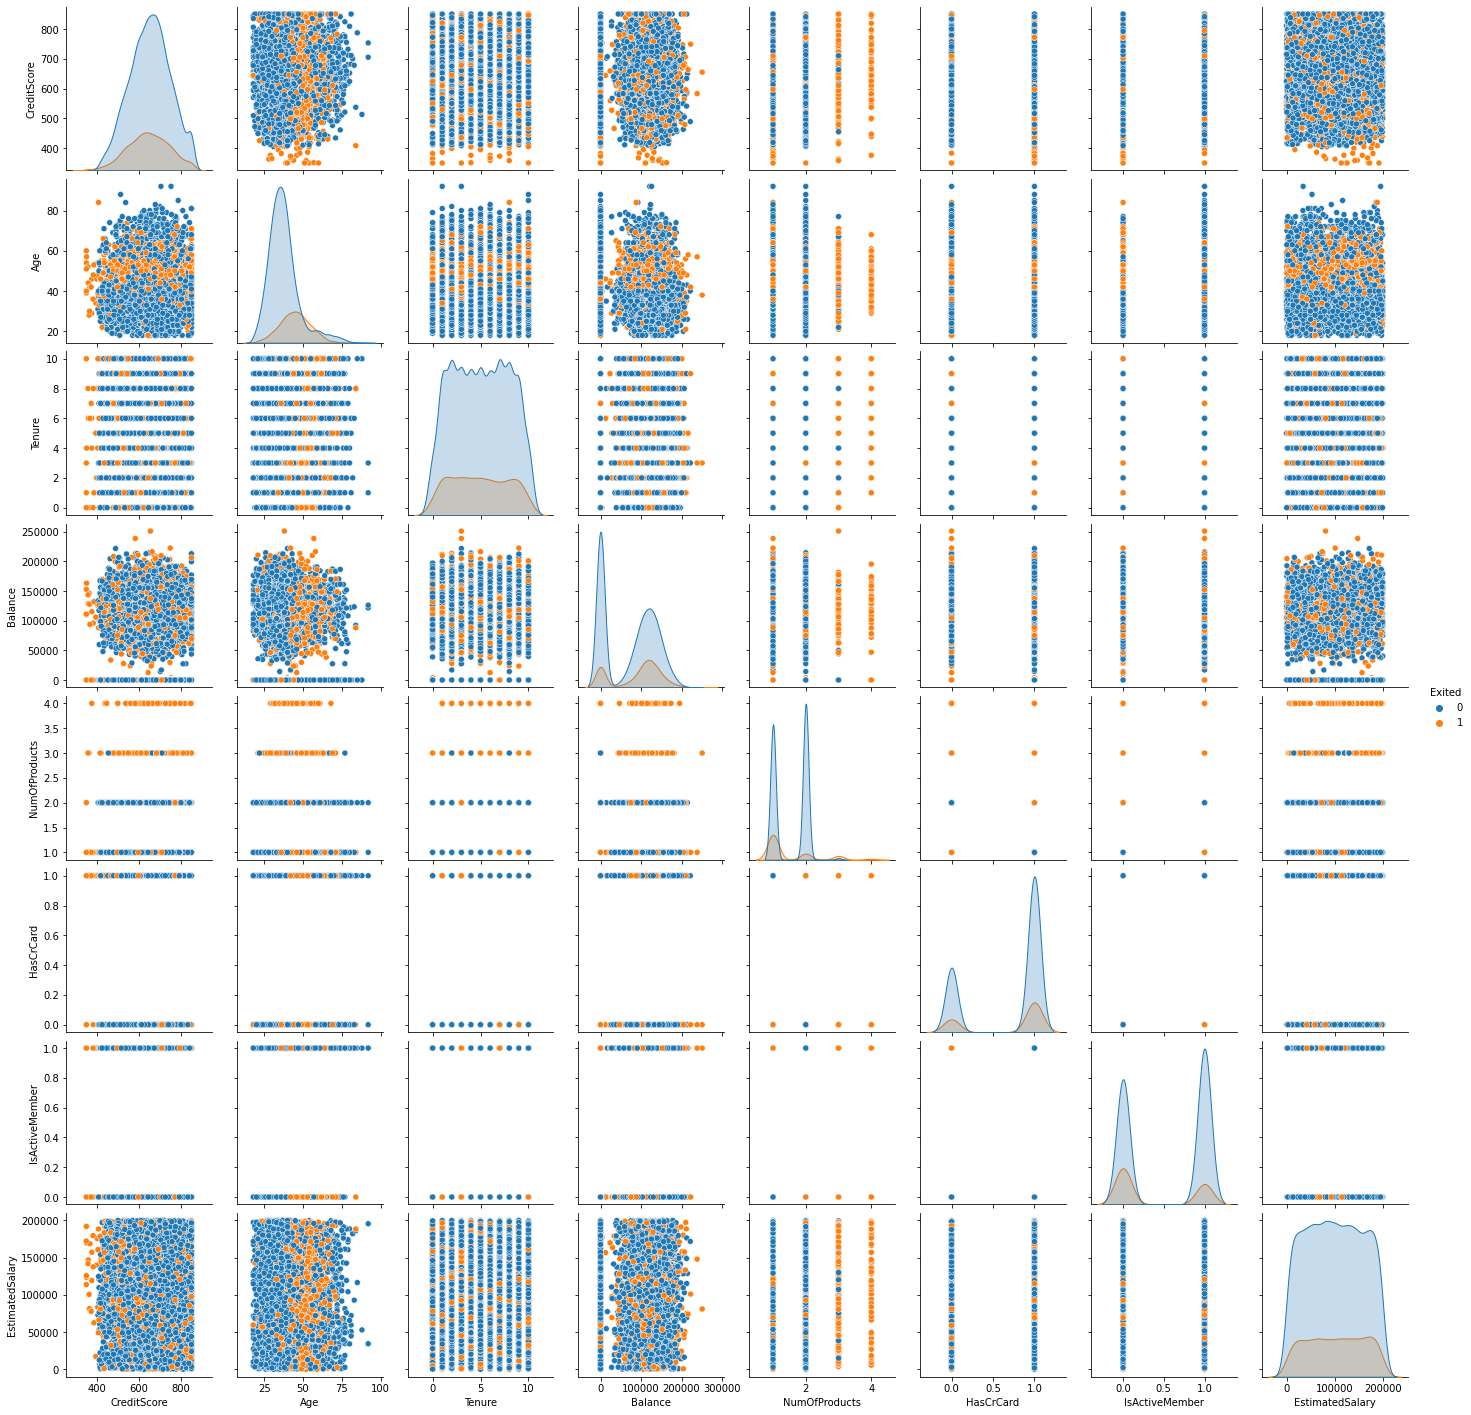

In [14]:
sns.pairplot(data=df, hue='Exited')

**Univariate analysis**

In [15]:
def plot_hist_box(data, drawkde=True):
    """
    Draws histplot and boxplot for a given dataset side-by-side
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2,gridspec_kw = {"width_ratios": (.5, .5)},figsize = (15,5),sharey=False)
    sns.histplot(data,ax=ax1, kde=drawkde);
    sns.boxplot(data);
    ax1.axvline(
        data.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        data.median(), color="red", linestyle="-"
    )  # Add median to the histogram

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


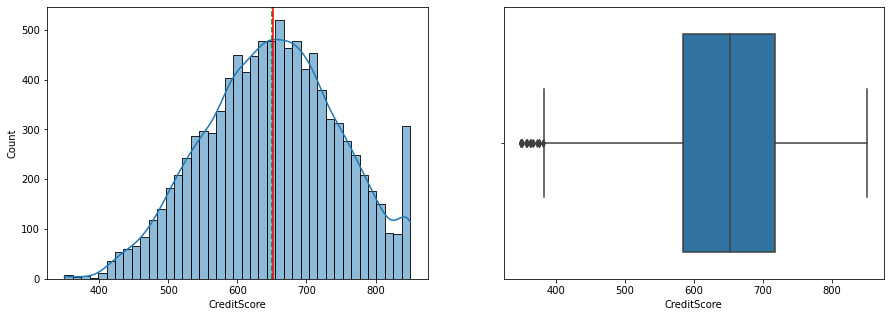

In [16]:
plot_hist_box(df['CreditScore'])

* CreditScore is slightly left skewed
* There are few outliers on the lower side of CreditScore

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


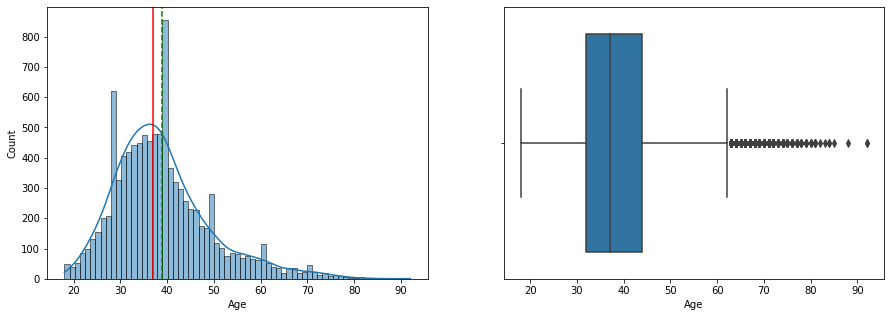

In [17]:
plot_hist_box(df['Age'])

* Age is right skewed with outliers towards the higher Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


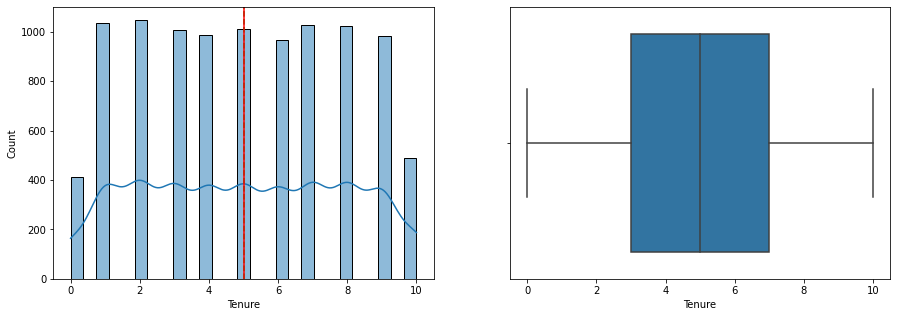

In [18]:
plot_hist_box(df["Tenure"])

* Tenure is equally distributed across most of the values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


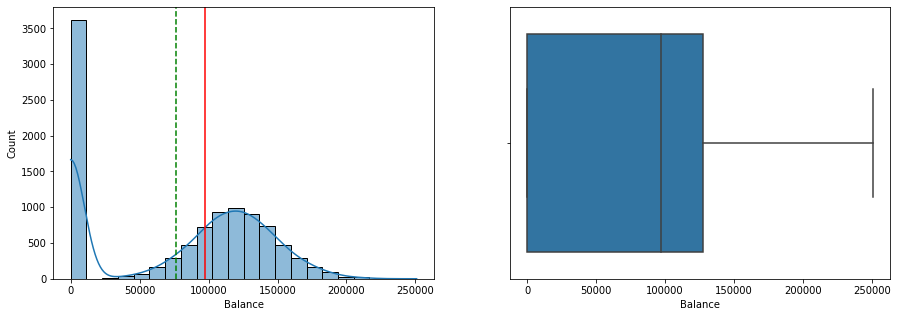

In [19]:
plot_hist_box(df["Balance"])

* Balance has majority of the values with 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


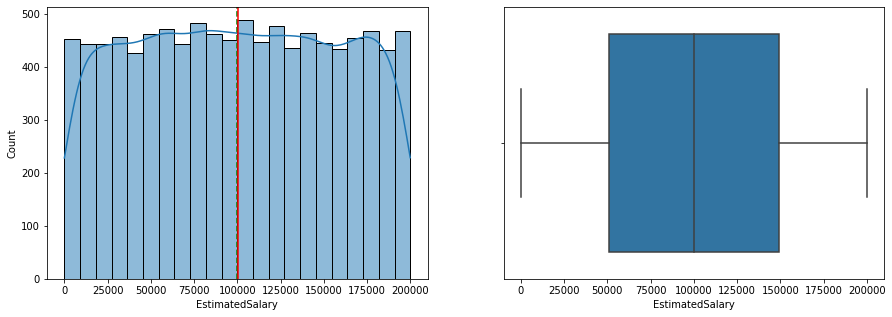

In [20]:
plot_hist_box(df["EstimatedSalary"])

* EstimatedSalary is equally distributed

**Bi-variate analysis**

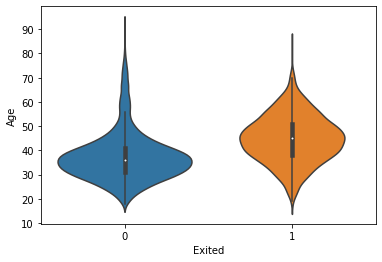

In [21]:
sns.violinplot(y=df['Age'], x=df['Exited'])

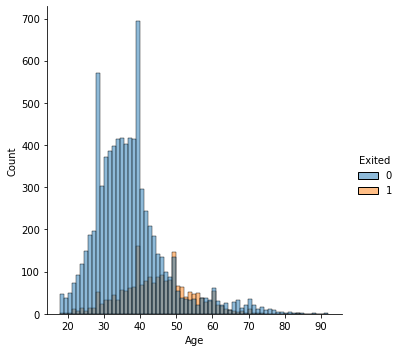

In [22]:
sns.displot(x=df['Age'], hue=df['Exited'])

* Majority of the customers between the Age 40-50 have Exited

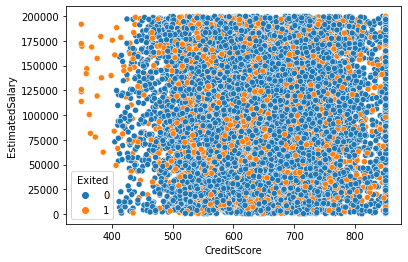

In [23]:
sns.scatterplot( x=df["CreditScore"], y=df["EstimatedSalary"], hue=df["Exited"])

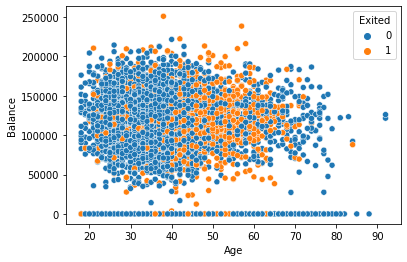

In [24]:
sns.scatterplot( x=df["Age"], y=df["Balance"], hue=df["Exited"])

**EDA Insights**

**Data Preparation for Modeling**

In [56]:
df=pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [57]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [58]:
X=df.drop("Exited", axis=1)
Y=df["Exited"]

In [59]:
from sklearn.preprocessing import StandardScaler
# Scaling the data through StandardScaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
scaled_X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


In [60]:
import sklearn     
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [80]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=1)


In [62]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [81]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=X_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
# Adding the output layer
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation='sigmoid'))

In [82]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                768       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 24)                792       
                                                                 
 dense_24 (Dense)            (None, 16)                400       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,057
Trainable params: 4,057
Non-traina

In [84]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 3ms/step - loss: 0.4487 - accuracy: 0.8097 - val_loss: 0.4067 - val_accuracy: 0.8231
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8375 - val_loss: 0.3647 - val_accuracy: 0.8506
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8511 - val_loss: 0.3587 - val_accuracy: 0.8494
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3481 - accuracy: 0.8595 - val_loss: 0.3491 - val_accuracy: 0.8512
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8598 - val_loss: 0.3465 - val_accuracy: 0.8544
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8641 - val_loss: 0.3470 - val_accuracy: 0.8469
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8641 - val_loss: 0.3483 - val_accuracy: 0.8525
Epoch 

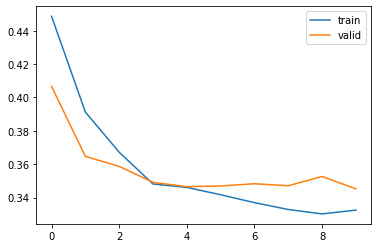

In [85]:
#Plotting the train and test loss
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [86]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8600
